# Arvud ja arvumassiivid

<div style="float: left;">Valter Kiisk<br><span style="font-size: 75%;">TÜ Füüsika Instituut</span></div><div style="float: right;">Viimati muudetud: 07.02.2019</div>

In [1]:
import math
import numpy as np
import sys
from matplotlib.pyplot import *
from matplotlib import rcParams

In [2]:
rcParams['figure.dpi'] = 100
rcParams['lines.markeredgewidth'] = 0
rcParams['lines.markersize'] = 5
rcParams['font.size'] = 12

## Arvutüübid

### Täisarvud

Atomaarne arvväärtus (täis- või reaalarv) säilitatakse arvuti mälus enamasti teatud kindla suurusega mälupesas, kus arvu väärtus kodeeritakse kokkulepitud viisil bittide jadana. Täisarvude korral lihtsalt arvu väärtus kahendsüsteemis kantakse otseselt üle vastavaks bitiseisundiks, nii et $n$-bitises mälupesas saab säilitada kõiki märgita (mittenegatiivseid) täisarve alates nullist kuni $2^n-1$ või märgiga täisarve vahemikus $-2^{n-1}$ kuni $2^{n-1}-1$. Seega täisarvude diapasoon on küll piiratud, aga vähemalt kõik sellesse diapasooni mahtuvad täisarvud on esindatud. Seevastu arvud reaalteljel paiknevad lõpmata tihedalt ja nende digitaalsel kirjeldamisel tuleb leida kompromiss täpsuse ja mastaabi vahel. Teatud standardsete arvuformaatidega (mis hõivavad enamasti 8, 16, 32 või 64 bitti mälu) suudab arvuti protsessor iseseisvalt (ja väga efektiivselt) läbi viia matemaatilisi elementaaroperatsioone.

Pythonis esindab täisarve klass `int`. Vaid numbritest koosnev literaal programmikoodis annabki täisarvu:

In [2]:
x = 500
type(x)

int

Kuigi riistvaralise toetusega arvud on piiratud suuruse või täpsusega, võib tarkvaras luua algoritmid kuitahes suurte, täis- või reaalarvuna tõlgendatavate bitijadadega opereerimiseks, kuigi operatsioonid selliste andmetega on märksa aeglasemad. Riistvaraliselt toetatud täisarvud on tüüpiliselt kuni 64-bitised (ehk maksimaalse suurusega 2<sup>63</sup>&ndash;1=9223372036854775807). Pythonis on otsene toetus piiramatu suurusega täisarvudele ja need võetakse vajadusel automaatselt kasutusele (andmetüüp endiselt `int`).

In [3]:
math.factorial(100)

93326215443944152681699238856266700490715968264381621468592963895217599993229915608941463976156518286253697920827223758251185210916864000000000000000000000000

In [4]:
2**500

3273390607896141870013189696827599152216642046043064789483291368096133796404674554883270092325904157150886684127560071009217256545885393053328527589376

Kõik tõsisemad arvutused Pythonis (eriti andmemassiividega) põhinevad paketil [NumPy](http://docs.scipy.org/doc/numpy/reference/), kus on defineeritud palju [avaram valik](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html) andmetüüpe, sealhulgas erineva suurusega ning märgiga ja märgita täisarve. Suurte andmemassiivide korral ei ole alati otstarbekas kasutada maksimaalse suurusega andmetüüpi (kulub palju mäluressurssi). Käsuga `numpy.iinfo` saame teada erinevate täisarvutüüpide diapasooni:

In [5]:
print(np.iinfo(np.int64))
print(np.iinfo(np.uint8))

Machine parameters for int64
---------------------------------------------------------------
min = -9223372036854775808
max = 9223372036854775807
---------------------------------------------------------------

Machine parameters for uint8
---------------------------------------------------------------
min = 0
max = 255
---------------------------------------------------------------



Kuna NumPy täisarvulised andmetüübid on kindla diapasooniga, siis aritmeetiliste operatsioonide käigus võib tekkida [ületäitumine](https://en.wikipedia.org/wiki/Integer_overflow). Sellistes arvutustes automaatselt mingeid avaramaid andmetüüpe kasutusele ei võeta (isegi kui andmetüüp on sedavõrd kitsas nagu `uint8`):

In [6]:
x = np.uint8(20)
x*x

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in ubyte_scalars
  


144

Siin matemaatiline tulemus peaks olema 400=110010000<sub>2</sub>, aga `uint8` mahutab ära vaid viimased 8 bitti ja kõrgeim bitt (kümnendsüsteemis väärtusega 256) läheb kaotsi, nii et järgi jääb 144. `uint8` ei suuda mahutada ka negatiivseid arve, näiteks siin on ületäitumise teke veelgi ilmsem:

In [7]:
np.uint8(0) - np.uint8(1)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in ubyte_scalars
  """Entry point for launching an IPython kernel.


255

Erandiks on jagamistehe (tavalise jagamismärgiga), mis viib tulemuse reaalarvuliseks:

In [8]:
x / 2

10.0

Tulemus saab olema reaalarvuline muidugi ka juhul kui üks operandidest on reaalarv. Sel juhul vähemalt täisarvulise ületäitumise ohtu ei ole:

In [9]:
np.uint8(20) * 20.0

400.0

### Reaalarvud

Arvutitehnilises mõttes eksisteerib kahte tüüpi reaalarve: püsikoma- ja ujukomaarvud. Digitaalkujul (kindla suurusega mälupesas) on püsikomaarvude mastaap võrdlemisi piiratud, kuid säilitatakse kindel arv komakohti. Seega sisuliselt on tegemist täisarvudega, kus lihtsalt koma on teatud arv kohti ettepoole nihutatud. Sellised arvud kirjeldatakse enamasti kümnendsüsteemis ja võivad olla mõistlikud finantsarvutustes jms rakendustes. Teadusarvutustes on pigemini tarvis ujukomaarve, st reaalarve avaras diapasoonis, säilitades seejuures *suhtelise täpsuse*, st kindla arvu tüvenumbreid. Arvutuskiiruse ja mälu optimaalse kasutamise huvides kirjeldatakse need arvud kahendsüsteemis.

Levinuim ujukomaarvude tüüp (mida esindab Pythoni `float` ja teistes keeltes `double`) hõivab 64 bitti. Selle diapasoon on umbes 10<sup>308</sup> ja täpsus kuni 17 tüvenumbrit. Nende arvude kodeering ja aritmeetika põhinevad standardil nimega [IEEE 754](https://en.wikipedia.org/wiki/IEEE_754). Näiteks arvu mantissi (tüvenumbrite) säilitamiseks on reserveeritud 52 bitti, nii et suhteline täpsus on ligikaudu 1 osa 2<sup>53</sup>-st ehk umbes 10<sup>-16</sup>.

In [10]:
x = 1.6e-19
type(x)

float

In [10]:
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

IEEE 754 standardiga defineeritud arvuformaat on piisavalt keeruline, et saab reserveerida mõned bitiseisundid, mis esindavad spetsiaalseid väärtuseid (pluss/miinus) lõpmatus ja määramatus (NaN, *not-a-number*). Näiteks aritmeetiliste operatsioonide käigus tekkiv ületäitumine annab lihtsalt spetsiaalse arvu `inf`:

In [11]:
1e300 * 1e100

inf

In [12]:
math.isinf(_)

True

In [12]:
1e1000

inf

Pythoni käitumine sellises olukorral pole siiski ühetaoline kõigi matemaatiliste operatsioonide jaoks, näiteks astendamine ja enamik `math` funktsioone hoopis katkestavad programmi veateatega:

In [13]:
1e300**2

OverflowError: (34, 'Result too large')

In [14]:
math.exp(1000)

OverflowError: math range error

`OverflowError` on üks Pythoni standardne [erind](https://en.wikipedia.org/wiki/Exception_handling) (*exception*). Kui potentsiaalne vea allikas asetada TRY-blokki, siis erindi saab "kinni püüda" EXCEPT-blokis:

In [15]:
try:
    x = math.exp(1000)
except OverflowError:
    print('Ületäitumine')
except ZeroDivisionError:
    print('Nulliga jagamine')
except Exception as e:
    print(str(e))

Ületäitumine


NumPy korral saab veakäsitlust kontrollida käsuga `numpy.seterr`:

In [16]:
np.seterr(all='ignore')
np.exp(1000)

inf

Mitmete matemaatiliste operatsioonide tulemus ei ole defineeritud. Sel juhul on tulemuseks NaN:

In [17]:
np.inf * 0

nan

In [18]:
np.sqrt(-1)

nan

In [19]:
np.log(-1)

nan

In [20]:
np.inf / np.inf

nan

NaN väärtuste võrdlemine on mõttetu (tulemus on alati `False`). Vajadusel saab kasutada funktsiooni `np.isnan` (või `math.isnan`):

In [21]:
np.isnan(_)

True

Pythoni `float` ja NumPy `float64` on sisuliselt identsed, aga sõneks konverteerimisel `float` väärtust veidi ümardatakse:

In [22]:
float(5.9975)

5.9975

In [23]:
np.float64(_)

5.9974999999999996

Kümnendmurde ei saa üldjuhul täpselt esitada kahendsüsteemis:

In [24]:
np.float64(0.1)

0.10000000000000001

Kui võtta vastavast mälupesast eraldi täisarvuna välja arvu tüvi (mantiss) ja astendaja (eksponent), siis tegeliku väärtuse arvuti mälus võiks esitada kujul `3602879701896397 / 2**55`. Selle väärtuse saame kuvada näiteks `decimal` mooduli abiga:

In [25]:
from decimal import Decimal
print(Decimal(0.1))

0.1000000000000000055511151231257827021181583404541015625


IEEE 754 defineerib ka laiendatud täpsusega (80 ja koguni 128 bitti) arvuformaadid. Vähemalt andmete salvestamisel on 64-bitine formaat levinuim, aga x86 protsessorid sisemiselt opereerivad (ja säilitavad vahetulemusi) 80-bitises formaadis. Viimast võiks põhimõtteliselt esindada `np.longdouble`, aga see sõltub platvormist. Windows'is `np.longdouble` ja `np.float64` on identsed:

In [26]:
print(np.finfo(np.longdouble))
print(np.finfo(np.float64))

Machine parameters for float64
---------------------------------------------------------------
precision =  15   resolution = 1.0000000000000001e-15
machep =    -52   eps =        2.2204460492503131e-16
negep =     -53   epsneg =     1.1102230246251565e-16
minexp =  -1022   tiny =       2.2250738585072014e-308
maxexp =   1024   max =        1.7976931348623157e+308
nexp =       11   min =        -max
---------------------------------------------------------------

Machine parameters for float64
---------------------------------------------------------------
precision =  15   resolution = 1.0000000000000001e-15
machep =    -52   eps =        2.2204460492503131e-16
negep =     -53   epsneg =     1.1102230246251565e-16
minexp =  -1022   tiny =       2.2250738585072014e-308
maxexp =   1024   max =        1.7976931348623157e+308
nexp =       11   min =        -max
---------------------------------------------------------------



Seevastu Linux'is:

In [5]:
print(np.finfo(np.longdouble))

Machine parameters for float128
---------------------------------------------------------------
precision= 18   resolution= 1e-18
machep=   -63   eps=        1.08420217249e-19
negep =   -64   epsneg=     5.42101086243e-20
minexp=-16382   tiny=       3.36210314311e-4932
maxexp= 16384   max=        1.18973149536e+4932
nexp  =    15   min=        -max
---------------------------------------------------------------



80-bitise väärtuse säilitamiseks 32- või 64-bitise arvuti mälus reserveeritakse ikkagi 96 või 128 bitti mälu, sellest ka tüübinimi `float128`.

Kui mäluressurss on piiratud ja arvutuste täpsus pole kriitiline, võib piirduda ka 32-bitiste ujukomaarvudega:

In [27]:
print(np.finfo(np.float32))

Machine parameters for float32
---------------------------------------------------------------
precision =   6   resolution = 1.0000000e-06
machep =    -23   eps =        1.1920929e-07
negep =     -24   epsneg =     5.9604645e-08
minexp =   -126   tiny =       1.1754944e-38
maxexp =    128   max =        3.4028235e+38
nexp =        8   min =        -max
---------------------------------------------------------------



## Arvutuste täpsus ja vigade edasikandumine

Vaatleme binaarset arvutustehet $u=x\bullet y$, kus $\bullet$ tähistab mingit aritmeetilist operatsiooni. Nagu eespool selgus, on 64-bitiste ujukomaarvude $x$ ja $y$ suhteline täpsus üldjuhul mitte parem kui $10^{-16}$. Arvutuste käigus vead akumuleeruvad. Suhteliselt väikeste absoluutsete vigade $\Delta x$ ja $\Delta y$ edasikandumist arvutustulemusse $u$ võib analüüsida diferentsiaalarvutuse abiga: $$|\Delta u| \approx \left|\frac{\partial u}{\partial x}\Delta x+\frac{\partial u}{\partial y}\Delta y\right|\leq \left|\frac{\partial u}{\partial x}\Delta x\right|+\left|\frac{\partial u}{\partial y}\Delta y\right|.$$ On ilmne, et liitmis- või lahutamistehte korral *absoluutsed vead liituvad*: $$|\Delta u|\leq |\Delta x|+|\Delta y|.$$ Seevastu korrutamis- või jagamistehte korral *suhtelised vead liituvad*: $$\left|\frac{\Delta u}{u}\right|\leq \left|\frac{\Delta x}{x}\right|+\left|\frac{\Delta y}{y}\right|.$$

Võib juhtuda, et arvude liitmisel-lahutamisel tulemus $u$ on absoluutväärtuselt hulga väiksem kui $|x|$ või $|y|$, järelikult suhteline viga [kasvab oluliselt](https://en.wikipedia.org/wiki/Loss_of_significance), kuigi absoluutne viga jääb peaaegu samaks. Näiteks funktsiooni $$u(x)=2\frac{\sqrt{1+x}-1}{x}$$ väärtus piiril $x\to 0$ peaks lähenema ühele. Tegelikult:

In [28]:
u = lambda x: 2*(math.sqrt(1+x)-1)/x

print(u(1e-6))
print(u(1e-8))
print(u(1e-12))
print(u(1e-14))
print(u(1e-15))
print(u(1e-16))

0.9999997501175528
0.999999993922529
1.000088900582341
0.9769962616701378
0.8881784197001251
0.0


Probleem tuleneb ilmselt sellest, et kahe lähedase arvu vahe $\sqrt{1+x}-1$ on väga väike. Antud juhul on võimalik sellest operatsioonist vabaneda, kui korrutada nii lugeja kui ka nimetaja teguriga $\sqrt{1+x}+1$: $$u(x)=\frac{2}{\sqrt{1+x}+1}.$$

In [29]:
u = lambda x: 2/(math.sqrt(1+x)+1)

print(u(1e-8))
print(u(1e-12))
print(u(1e-14))
print(u(1e-16))

0.9999999975
0.99999999999975
0.9999999999999976
1.0


## Piiramatu täpsusega ujukoma-arvutused

Pythoni standardvahendite hulka kuulub moodul `decimal`, mis pakub piiramatu täpsusega arvutüüpi `Decimal`. See on pigem ette nähtud kümnendmurdude täpseks esitamiseks (finantsarvutused vms). Üldisteks vajadusteks sobivad ujukomaarvud realiseerib moodul `mpmath`. Reaalarve esindab klass `mpf` ja kompleksarve `mpc`. See moodul ekspordib muuhulgas samasuguse komplekti elementaarfunktsioone ja konstante nagu `math` või `cmath`. Näiteks arvu $\pi$ väärtus 1000 komakoha täpsusega (`dps` tähendab *decimal places*):

In [30]:
from mpmath import mp, mpf, pi, sqrt, log
mp.dps = 1000
print(pi)

3.14159265358979323846264338327950288419716939937510582097494459230781640628620899862803482534211706798214808651328230664709384460955058223172535940812848111745028410270193852110555964462294895493038196442881097566593344612847564823378678316527120190914564856692346034861045432664821339360726024914127372458700660631558817488152092096282925409171536436789259036001133053054882046652138414695194151160943305727036575959195309218611738193261179310511854807446237996274956735188575272489122793818301194912983367336244065664308602139494639522473719070217986094370277053921717629317675238467481846766940513200056812714526356082778577134275778960917363717872146844090122495343014654958537105079227968925892354201995611212902196086403441815981362977477130996051870721134999999837297804995105973173281609631859502445945534690830264252230825334468503526193118817101000313783875288658753320838142061717766914730359825349042875546873115956286388235378759375195778185778053217122680661300192787661119590921642019

Igasugune kümnendpunkti sisaldav arvliteraal Pythoni koodis tõlgendatakse andmetüübina `float` ja seega ei saa olla täpsem kui 17 tüvenumbrit. Suure täpsusega arvutustes (sh moodulid `decimal`, `mpmath` ja `sympy`) tuleb vajadusel arvandmed sisestada sõnena, et vältida täpsuse kadu:

In [28]:
mp.dps = 50
print( sqrt(0.01) ) # tulemus peaks olema 0.1 ?
print( sqrt(mpf(0.01)) )
print( sqrt(mpf('0.01')) )

0.10000000000000000104083408558608425123047672024604
0.10000000000000000104083408558608425123047672024604
0.1


Üks praktiline näide, mis illustreerib vajadust suure täpsusega ujukomaarvude järgi, on tuletise numbriline arvutamine. Arvutame näiteks funktsiooni $\ln(x)$ tuletise kohal $x=1$. Teooriast on teada, et $\ln(x)'=1/x$, seega vastus peaks tulema täpselt 1. Valemi tuletise numbriliseks arvutamiseks saame otse tuletise definitsioonist: $$f(x)' \approx \frac{f(x+h)-f(x)}{h},$$ kus samm $h$ peab olema võimalikult väike. Jällegi toimub kahe hästi lähedase väärtusega ujukomaarvu lahutamine üksteisest, mis viib suhtelise vea väga suureks. Efekt oleks veelgi ilmsem kui arvutada kõrgemat järku tuletisi.

Esialgu lahendus standardsete ujukomaarvude abil ja süstemaatiliselt varieerime sammu, et näha selle mõju tulemuse täpsusele:

In [29]:
x = 1.0
tuletis = lambda h: (math.log(x + h) - math.log(x)) / h

print( tuletis(1e-2) )
print( tuletis(1e-6) )
print( tuletis(1e-10) )
print( tuletis(1e-12) )
print( tuletis(1e-15) )

0.9950330853168092
0.9999994999180668
1.000000082690371
1.000088900581841
1.1102230246251559


Nagu näha, suurim täpsus saavutatakse sammuga umbes `1e-10`, kui aga võtta sammuks `1e-15`, on tulemus juba täiesti vale.

Kordame sama mooduliga `mpmath`, millel käsime arvutada 50 kümnendkoha täpsusega. Nüüd saavutame hea täpsuse isegi nii väikese sammuga nagu `1e-30`.

In [31]:
mp.dps = 50

x = mpf(1)
tuletis = lambda h: (log(x + h) - log(x)) / h

print( tuletis(1e-2) )
print( tuletis(1e-10) )
print( tuletis(1e-20) )
print( tuletis(1e-30) )

0.99503308531680828471882467695335617132341250890357
0.99999999995000000000333333151147346780134756978438
0.99999999999999999999500000000000000027426697606229
0.99999999999999999999999999999949999999999999995833


## Massiivid

Klassikaliselt peetakse massiivi (*array*) all silmas sellist agregaati, kus elemendid on järjestatud ning adresseeritavad ühe või mitme täisarvulise *indeksiga*. Seejuures massiiv on *homogeenne* ja *sidus*, st kõik elemendid on sama tüüpi ja paiknevad arvuti mälus katkematu rivina. Seetõttu saab kasutada [mäluviitade](https://en.wikipedia.org/wiki/Pointer_%28computer_programming%29) aritmeetikat, nii et elemendi poole pöördumine (lugemine/kirjutamine) on konstantse ajaga ehk $\mathcal{O}(1)$ operatsioon (tähise $\mathcal{O}(1)$ jm seonduva kohta vt  Wikipedia artikleid: [Algorithmic efficiency](https://en.wikipedia.org/wiki/Algorithmic_efficiency) ja [Big O notation](https://en.wikipedia.org/wiki/Big_O_notation)).

Üldisteks vajadusteks on väga sobivad sellised dünaamilised ja paindlikud andmestruktuurid, mida esindab Pythoni järjend:
* Järjend võib olla kuitahes heterogeenne. Järjend on sisuliselt viitade massiiv, kus viidad võivad osutada suvalistele Pythoni objektidele, mis on arvuti mälus laiali.
* Nii nagu massiivi korral, ka järjendi elemendi poole pöördumine on $\mathcal{O}(1)$ operatsioon.
* Elementide lisamine järjendi lõppu (`append`) on samuti praktiliselt $\mathcal{O}(1)$ operatsioon, sest alusmassiivile [reserveeritakse mälu varuga](https://en.wikipedia.org/wiki/Dynamic_array).

Samas on järjendid (osaliselt nimetatud omaduste tõttu):
* aeglasemad
* suurema mälunõudlusega
* vaid ühemõõtmelised
* ebamugavad matemaatiliste operatsioonide sooritamiseks

Pakett NumPy realiseerib teadusarvutusteks sobivad klassikalised andmemassiivid (`numpy.ndarray`) ja põhilised matemaatilised operatsioonid nende massiividega. NumPy massiivid on homogeensed, nende mälunõudlus on väiksem ning matemaatilised operatsioonid kiiremad.

Testime kahe arvumassiivi element-kaupa korrutamiseks kuluvat aega. Viimast saab Jupyteri töölehel lihtsasti mõõta "[maagilise käsuga](http://ipython.readthedocs.io/en/stable/interactive/magics.html)" `%timeit`. Pythoni järjendite korral on mugavaim võte matemaatiliste operatsioonide teostamiseks *list comprehension*:

In [30]:
X = [0.001 * i for i in range(100000)]
A = [math.sin(x) for x in X]
B = [math.exp(-x) for x in X]
print(len(A), 'elementi')

%timeit Y = [a*b for a,b in zip(A,B)]

100000 elementi
8.14 ms ± 79.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


NumPy ja SciPy korral kõik matemaatilised funktsioonid (`sin`, `exp`, jne), aritmeetikatehted, lineaaralgebra operatsioonid jm piisavalt üldised algoritmid on juba [vektoriseeritud](https://en.wikipedia.org/wiki/Array_programming). Näiteks käsuga `Y = numpy.sin(X)` antakse mõista, et tuleb arvutada massiivi `X` iga elemendi siinus ja tulemustest konstrueerida samas järjestuses uus massiiv. Vastavad FOR-tsüklid jm arvutusloogika on realiseeritud juba C-s või Fortranis, ja need võivad põhimõtteliselt kasutada isegi paralleelarvutust (juhul kui NumPy/SciPy on kompileeritud vastavaid riistvara võimalusi arvestades). 

In [31]:
X = np.arange(0, 100, 0.001)
A = np.sin(X)
B = np.exp(-X)
print(len(A), 'elementi')
    
%timeit Y = A * B

100000 elementi
117 µs ± 9.59 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


NumPy massiivi loomisel saab spetsiaalselt ära näidata [andmetüübi](http://docs.scipy.org/doc/numpy-1.10.1/user/basics.types.html). Täisarvuliste andmete korral on see vaikimisi `int32` või `int64`, reaalarvuliste andmete korral `float64`:

In [32]:
A = np.array([(1, 2, 3), (4, 5, 6)])
print(A.dtype)

B = np.array([(1, 1.5, 2), (2.5, 3, 3.5)])
print(B.dtype)

int32
float64


Mõnikord kasutatakse mälu kokkuhoiu huvides ka 8-bitise andmetüübiga massiive:

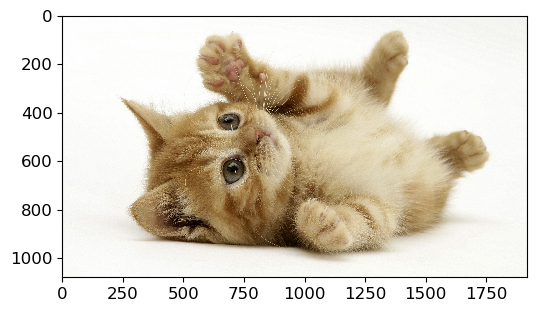

mõõdud: (1080, 1920, 3)
andmetüüp: uint8
miinimum: 0
maksimum: 255
mäluvajadus (kB): 6075


In [32]:
pilt = imread('cat.jpg')
imshow(pilt)
show()

print('mõõdud:', pilt.shape)
print('andmetüüp:', pilt.dtype)
print('miinimum:', np.amin(pilt))
print('maksimum:', np.amax(pilt))
print('mäluvajadus (kB):', pilt.nbytes // 1024)

Seega antud pildifailist laaditud massiiv on kolmemõõtmeline, st kahemõõtmeline pikslite võrgustik (1080 rida ja 1920 veergu), kus iga piksel omakorda sisaldab kõigi kolme primaarvärvuse (punane, roheline, sinine) signaali. Kui sellise täisarvudest koosneva massiiviga ettevaatamatult teostada matemaatilisi operatsioone, võib kergesti tekkida ületäitumine ja tulemus saab olema üsna kaootiline:

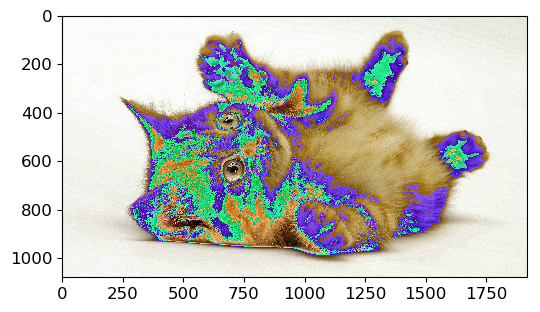

In [33]:
pilt = pilt * 2  # tahame teha pilti heledamaks
imshow(pilt)
show()

Vajadusel saab massiivi andmetüüpi laiendada, mis tähendab ka mälunõudluse kasvu:

In [35]:
pilt = pilt.astype(np.float)  # või np.asfarray(pilt)
print('mäluvajadus (kB):', pilt.nbytes // 1024)

mäluvajadus (kB): 48600


Lõpetuseks vaatleme ühte andmetöötlusülesannet, mis illustreerib massiivi mõõtmetega manipuleerimist ja signaali summeerimist/keskmistamist ühe mõõtme sihis. Loeme mahuka massiivi failist:

In [57]:
tabel = np.loadtxt('katse.txt', skiprows=2, unpack=True)
tabel.shape

(3, 9124)

Failis oli seega 3 andmeseeriat (arvutulpa) ja 9124 kirjet. Eraldame ("pakime lahti") andmeseeriad ja kuvame näitena ühe sõltuvuse graafiku:

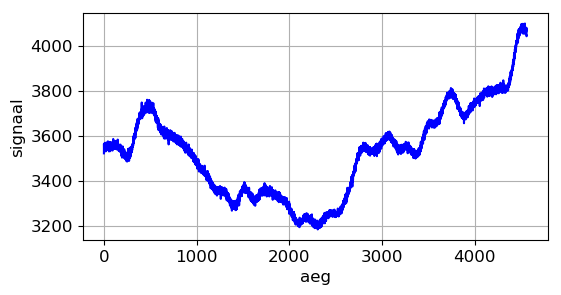

In [58]:
X, Y, Z = tabel

figure( figsize=(6,3) )
plot(X, Y, 'b-')
xlabel('aeg')
ylabel('signaal')
grid()
show()

Graafikult on ilmne, et signaali muutused on üsna aeglased, nii et andmepunkte võiks olla tunduvalt vähem kui 9124. Andmepunktide äraviskamine pole mõistlik, pigem võiks teatud arv (näiteks 10) järjestikust punkti kokku summeerida või keskmistada (tulemusena mitte ainult signaal muutub siledamaks, vaid edasistes operatsioonides kasvab ka arvutuskiirus ja väheneb mälunõudlus). Ilmselt 9124 ei jagu 10-ga, seega tagant tuleb mõned katsepunktid ära visata. Täisarvulise jagamise operaatoriga `//` saame kindlaks teha, mitu korda arv 10 mahub 9124 sisse, ja vastavalt lõikame välja relevantse osa andmetest:

In [59]:
keskm = 10
seeriaid, punkte = tabel.shape
punkte = (punkte // keskm) * keskm
tabel = tabel[:, :punkte]
punkte

9120

Nüüd muudame tabeli kolmemõõtmeliseks:

In [60]:
tabel = tabel.reshape(seeriaid, -1, keskm)
tabel.shape

(3, 912, 10)

Nüüd saame keskmistada kõik arvud viimase telje sihis:

In [61]:
tabel = tabel.mean(axis=2)
tabel.shape

(3, 912)

Ootuspäraselt massiivi mõõtmete arv vähenes 1 võrra ja elemente jäi täpselt 10 korda vähemaks. Viimaks graafik silutud andmetega:

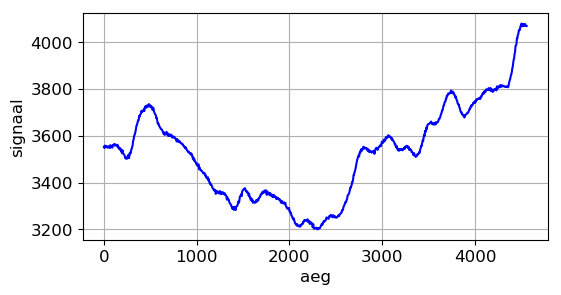

In [41]:
figure( figsize=(6,3) )
plot(tabel[0], tabel[1], 'b-')
xlabel('aeg')
ylabel('signaal')
grid()
show()

## Massiivi vaade

NumPy massiivi kuju muutmise, "viilutamise", transponeerimise vms operatsiooni korral koopiat massiivi elementidest ei tehta, vajadusel luuakse lihtsalt uus *vaade* (*view*) algsele massiivile. Seega mitu erinevat `numpy.ndarray` objekti võivad omavahel [jagada](https://docs.scipy.org/doc/numpy/reference/internals.html) üht ja sama andmepuhvrit. Kui nüüd üht neist massiividest muuta (kirjutada mõni element üle), siis ka seotud massiivid muutuvad vastavalt:

In [42]:
X = np.arange(1, 9, dtype=np.int16)
print('algmassiiv:', X)
Y = X[2:6]
print('lõige:', Y)

print('muudame ühe elemendi algmassiivis')
X[3] = 0

print('algmassiiv:', X)
print('lõige:', Y)

algmassiiv: [1 2 3 4 5 6 7 8]
lõige: [3 4 5 6]
muudame ühe elemendi algmassiivis
algmassiiv: [1 2 3 0 5 6 7 8]
lõige: [3 0 5 6]


In [43]:
print('taastame elemendi väljalõikes')
Y[1] = 4

print('lõige:', Y)
print('algmassiiv:', X)

taastame elemendi väljalõikes
lõige: [3 4 5 6]
algmassiiv: [1 2 3 4 5 6 7 8]


Meetodiga `copy` saab vajadusel siiski koopia teha, nii et massiivid muutuvad üksteisest sõltumatuks:

In [44]:
Y = X.copy()
Y[2] = 0
print('muudetud koopia:', Y)
print('algmassiiv:', X)

muudetud koopia: [1 2 0 4 5 6 7 8]
algmassiiv: [1 2 3 4 5 6 7 8]


Vaate mõistega saab veelgi kaugemale minna, kus muudetakse isegi baitide sisu tõlgendust (st andmetüüpi). Niiviisi saame näiteks uurida, millistest baitidest massiiv koosneb:

In [45]:
X = np.array( (1576231, ), dtype=np.int64)
print('algmassiiv (int64):', X)
Y = X.view(np.uint8)
print('vaade (uint8):', Y)

algmassiiv (int64): [1576231]
vaade (uint8): [39 13 24  0  0  0  0  0]


Siin algmassiiv sisaldab vaid ühe `int64` arvu, mis hõivab arvuti mälus kaheksa baiti. Pärast andmetüübi muutmist saamegi 8-st elemendist koosneva massiivi, kus iga väärtus väljendab vastava baidi sisu interpreteerituna kahendsüsteemis. Ühtlasi näeme, et Inteli protsessoritele kohaselt on tegemist *little-endian* järjestusega, st kõige väiksema väärtusega bait tuleb mälus esimesena. Ootuspäraselt $$24\cdot 256^2+13\cdot 256 + 39=1576231.$$ 

## Indekseerimine

Andmemassiividega töötamisel on sageli tarvis välja eraldada teatud osi või lõikeid massiividest. Lihtsaim seda laadi tegevus on "viilutamine" (*slicing*) üldkujul `A[a:b:s]`, mis toimib sarnaselt Pythoni jadadega. Viilutamine on arvutuslikult väga efektiivne, tagastades lihtsalt uue vaate algmassiivile.

Viilutamisega saab vaid massiivi elemendid indeksi teatud vahemikus ja kindla sammuga. NumPy võimaldab ka üldisemat indekseerimist kujul `A[I]`, kus `I` on massiiv või järjend. Kui `I` sisaldab täisarve, siis `A[I]` tagastab massiivist `A` kõik need elemendid (uue massiivina), mille indeksid sisalduvad massiivis `I`. `I` tohib olla ka tõeväärtuste massiiv, kui see on sama pikkusega nagu `A`. Sel juhul tagastatakse elemendid nendel positsioonidel, kus `I` sisaldab tõeväärtust `True`. Selliseid tõeväärtusmassiive saab võrdlusoperatsiooniga, näiteks `A[A > 0]` tagastab kõik positiivsed elemendid massiivist `A`. Vektoriseeritud loogikatehteid esindavad funktsioonid `numpy.logical_and`, `numpy.logical_or`, jne (Pythoni enda loogikatehted selles kontekstis ei toimi). Indekseerimisel saab nii elemente lugeda kui ka üle kirjutada. Näiteks `A[A < 0] = 0` asendab kõik negatiivsed elemendid nulliga.

Järgmises näites on näha teatav signaal (teravad piigid) võrdlemisi sileda ja aeglaselt muutuva fooni taustal:

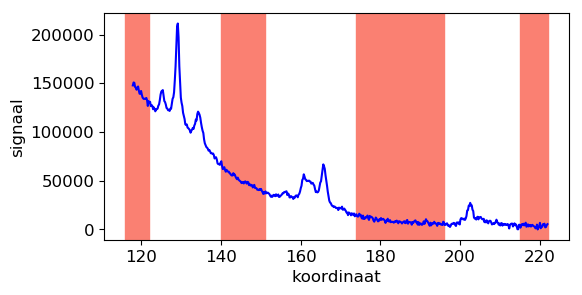

In [49]:
X, Y = np.loadtxt('signaal_foonil.txt', unpack=True)

vahemikud = (
    (116, 122),
    (140, 151),
    (174, 196),
    (215, 222)
)

figure( figsize=(6,3) )
plot(X, Y, 'b-')
for v in vahemikud:
    axvspan(*v, color='salmon')
xlabel('koordinaat')
ylabel('signaal')
show()

Punase varjutusega on tähistatud piirkonnad, kus on näha ainult foon. Konstrueerime tõeväärtusmassiivi, mis märgistab vastavad andmepunktid: 

In [57]:
foon = np.logical_or.reduce( [ np.logical_and(X >= a, X <= b) for a,b in vahemikud ] )
foon[:150]   # kuvame näitena 150 esimest elementi

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

Eraldame algmassiividest vastavad punktid ja sobitame neist läbi polünoomi:

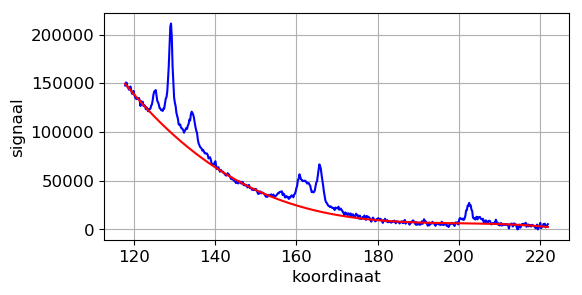

In [51]:
p = np.polyfit( X[foon], Y[foon], 3 )
Yp = np.polyval(p, X)

figure( figsize=(6,3) )
plot(X, Y, 'b-')
plot(X, Yp, 'r-')
xlabel('koordinaat')
ylabel('signaal')
grid()
show()

Nüüd saame näiteks vektoriseeritud operatsiooniga tausta eemaldada:

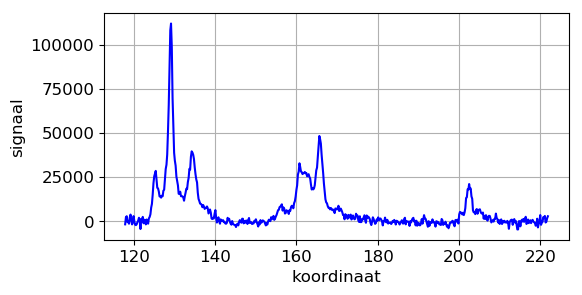

In [52]:
figure( figsize=(6,3) )
plot(X, Y - Yp, 'b-')
xlabel('koordinaat')
ylabel('signaal')
grid()
show()